In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style('darkgrid')
mpl.rcParams['figure.figsize'] = [18,10]

### Basics of hierarchical clustering

### Creating a distance matrix using linkage
```python
scipy.cluster.hierarchy.linkage(observations,
                                method='single',
                                metric='euclidean',
                                optimal_ordering=False)
```
- `method`: how to calculate the proximity of clusters
- `metric`: distance metric
- `optimal_ordering`: order data points

### Which method should be used?
- single: based on two closet objects
- complete: based on two farthest objects
- average: based on the arithmetic mean of all objects
- centroid: based on the geometric mean of all objects
- median: based on the median of all objects
- ward: based on the sum of squares

### Create cluster lables with fcluster
```python
scipy.cluster.hierarchy.fcluster(distance_matrix,
                                 num_clusters,
                                 criterion)
```
- `distance_matrix`: output of `linkage()` method
- `num_clusters`: numbers of clusters
- `criterion`: how to decide thresholds to form clusters

### Final thoughts on selecting a method
- No one right method for all
- Need to carefully understand the distribution of data 

In [3]:
x_coordinate = [17, 20, 35, 14, 37, 33, 14, 30, 35, 17, 11, 21, 13, 10, 81, 84, 87, 83, 90, 97, 94, 88, 89, 93, 92, 82, 81, 92, 91, 22, 23, 25, 25, 27, 17, 17]
y_coordinate = [  4,   6,   0,   0,   4,   3,   1,   6,   5,   4,   6,  10,   8, 10,  97,  94,  99,  95,  95,  97,  99,  99,  94,  99,  90,  98, 100,  93,  98,  15,  10,   0,  10,   7,  17,  15]

In [4]:
from scipy.cluster.vq import whiten
comic_con = pd.DataFrame({'x_coordinate': x_coordinate,
                          'y_coordinate': y_coordinate,
                          'x_scaled': whiten(x_coordinate),
                          'y_scaled': whiten(y_coordinate)})

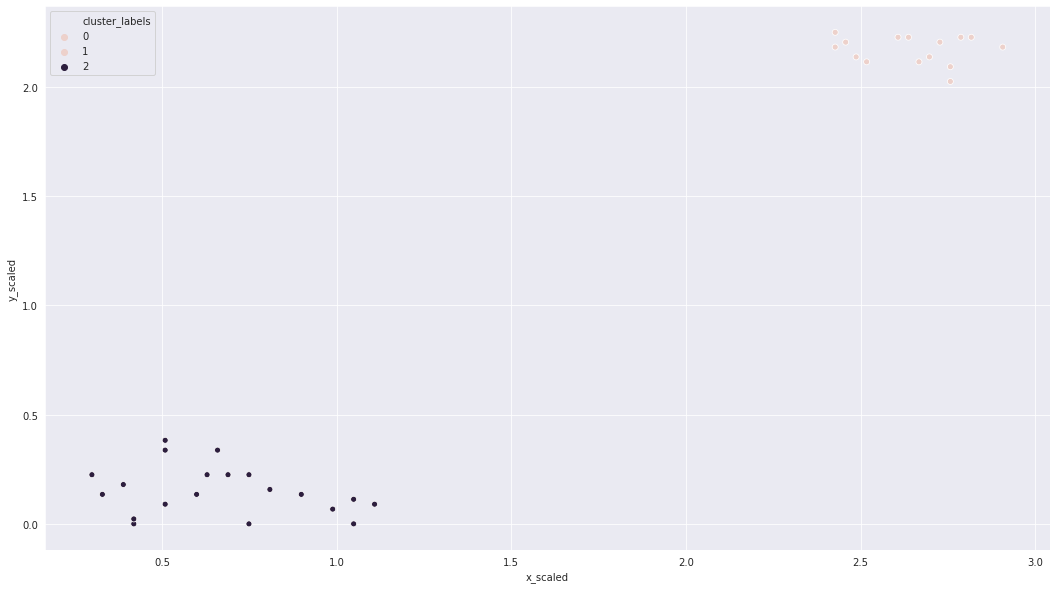

In [5]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method='ward', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

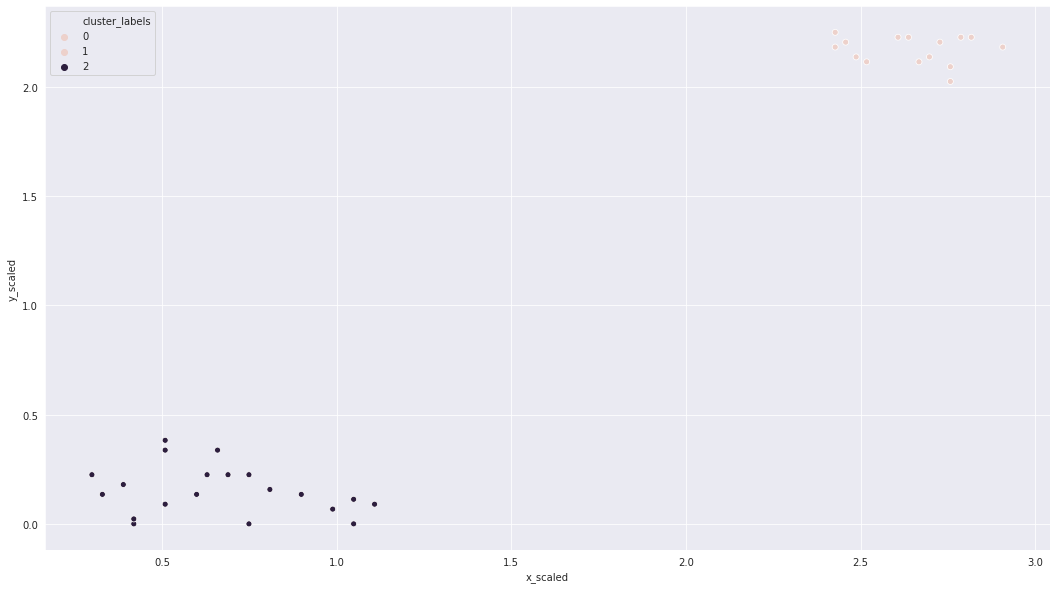

In [6]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'single', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

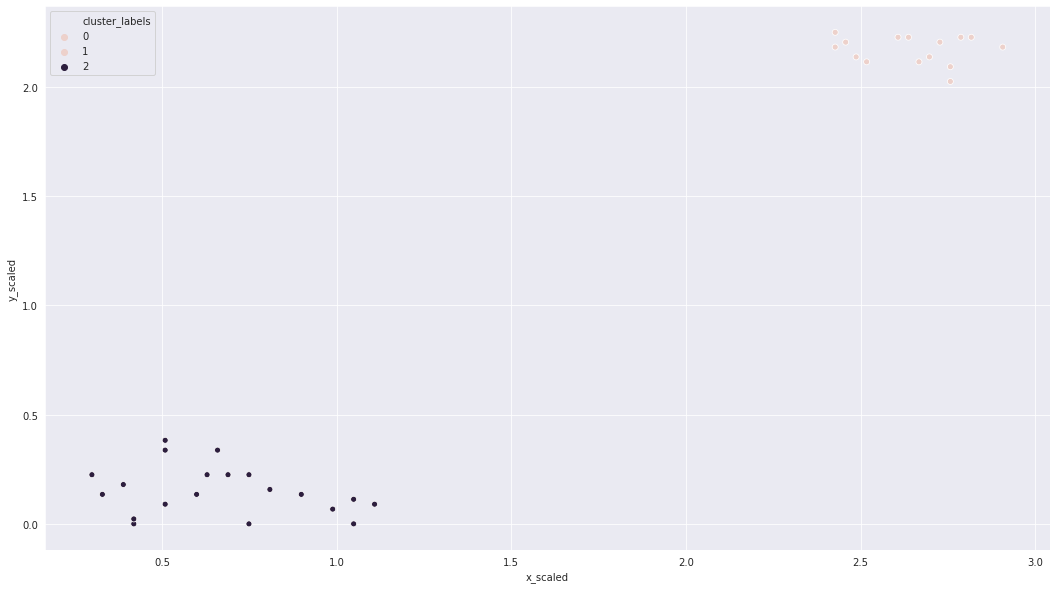

In [7]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method='complete', metric='euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

### Visualize clusters

### Why visualize clusters?
- Try to make sense of the clusters formed
- An additional step in validation of clusters
- Spot trends in data

### An introduction to seaborn
- `seaborn`: a Python data visualization library based on `matplotlib`
- Has better, easily modifiable aesthetics than matplotlib
- Contains functions that make data visualizations tasks easy in the context of data analytics
- Use case for clustering: `hue` parameter for plots

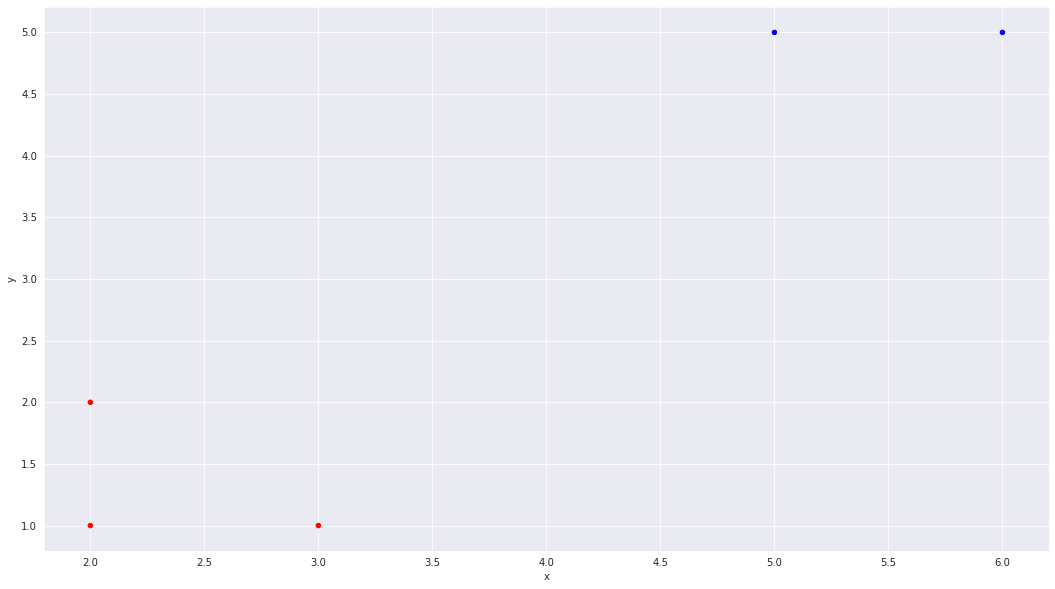

In [8]:
df = pd.DataFrame({'x': [2, 3, 5, 6, 2],
                   'y': [1, 1, 5, 5, 2],
                   'labels': ['A','A','B','B','A']})

colors = {'A': 'red', 'B':'blue'}

df.plot.scatter(x='x', y='y', c=df['labels'].apply(lambda x: colors[x]))

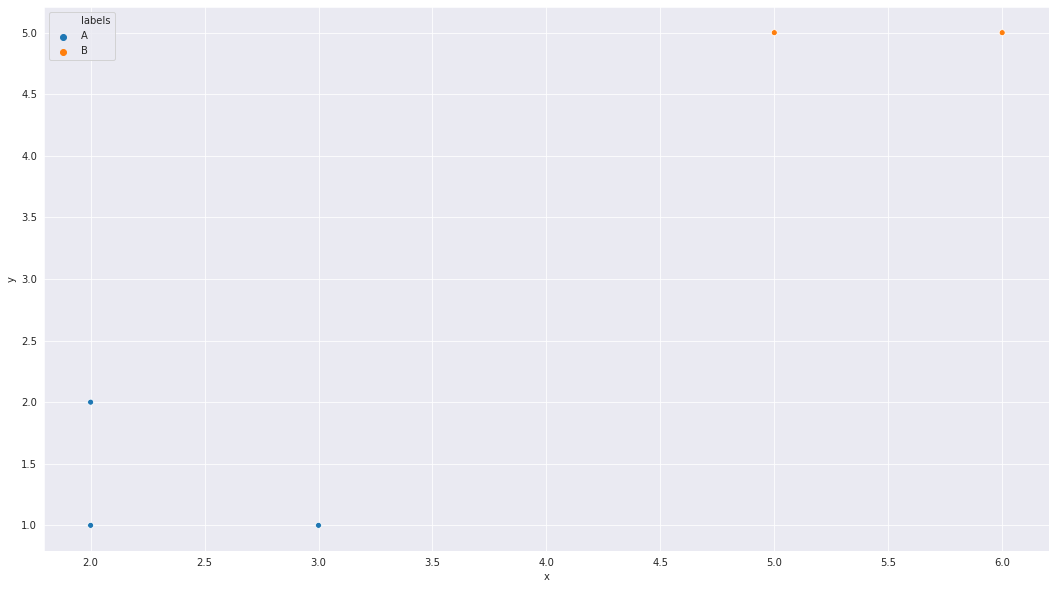

In [9]:
sns.scatterplot(x='x',
               y='y',
               hue='labels',
               data=df)

plt.show()

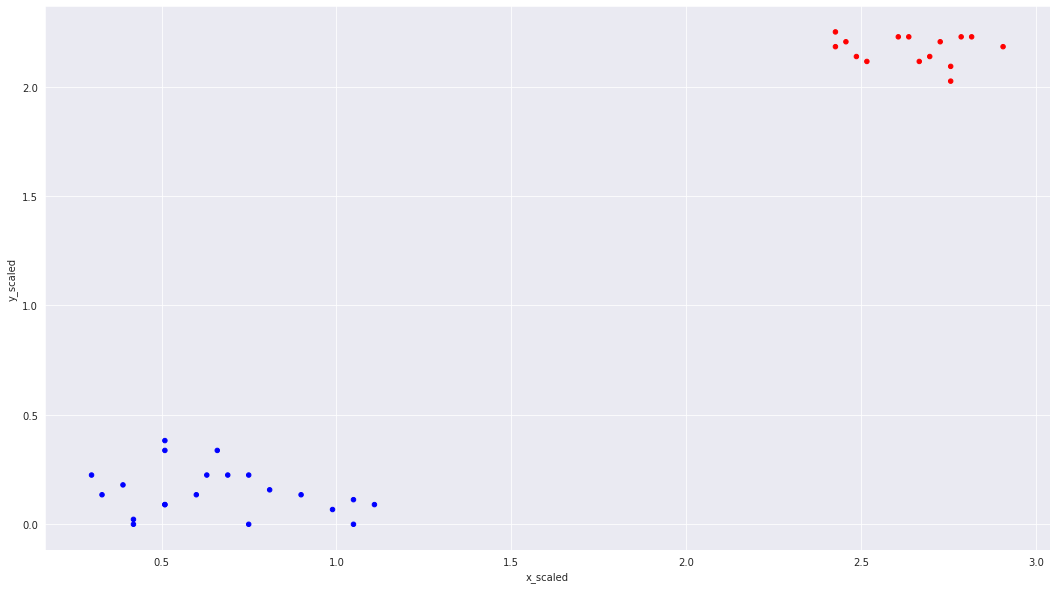

In [10]:
# Import the pyplot class
import matplotlib.pyplot as plt

# Define a colors dictionary for clusters
colors = {1:'red', 2:'blue'}

# Plot a scatter plot
comic_con.plot.scatter(x = 'x_scaled', 
                	   y = 'y_scaled',
                	   c = comic_con['cluster_labels'].apply(lambda x: colors[x]))
plt.show()

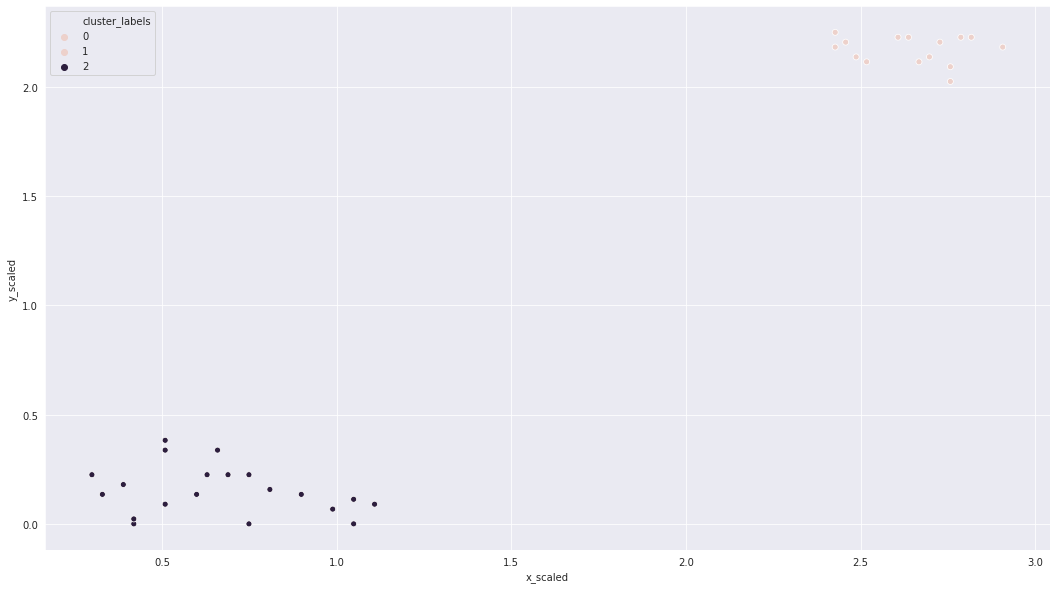

In [11]:
# Import the seaborn module
import seaborn as sns

# Plot a scatter plot using seaborn
sns.scatterplot(x='x_scaled', 
                y='y_scaled', 
                hue='cluster_labels', 
                data = comic_con)
plt.show()

### Introduction to dendrograms
- Strategy till now - decide clusters on visual inspection
- Dendrograms help in showing progressions as clusters are merged
- A dendrogram is a branching diagram that demostrates how each cluster is composed by branching out into its child nodes

### Create a dendrogram in SciPy

In [12]:
from scipy.cluster.hierarchy import dendrogram

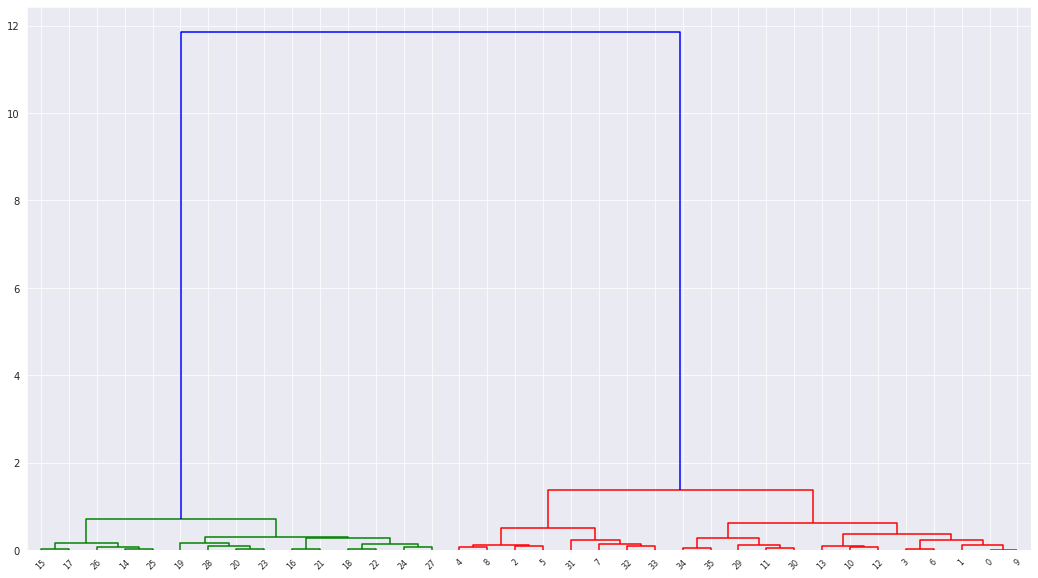

In [13]:
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']],
           method='ward',
           metric='euclidean')


dn = dendrogram(distance_matrix)
plt.show()

### Limitations of hierarchical clustering

### Measuring speed in hierarchical clustering
- `timeit` module
- Measure the speed of `.linkage()` method
- Use randomly generated points
- Run various iterations to extrapolate

### Use of timeit module

In [14]:
import random, timeit

points = 100

df = pd.DataFrame({'x': random.sample(range(0, points), points),
                   'y': random.sample(range(0, points), points)})

%timeit linkage(df[['x', 'y']], method='ward', metric='euclidean')

4.58 ms ± 425 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Comparison of runtime of linkage method
- Increasing runtime with data points
- Quadratic increase of runtime
- Not feasible for large datasets

In [22]:
fifa = pd.read_csv('data/fifa_18_dataset.csv')
fifa = fifa.iloc[:5000, :]
fifa.columns

Index(['sliding_tackle', 'aggression'], dtype='object')

In [24]:
fifa['scaled_sliding_tackle'] = whiten(fifa['sliding_tackle'])
fifa['scaled_aggression'] = whiten(fifa['aggression'])
fifa.columns

Index(['sliding_tackle', 'aggression', 'scaled_sliding_tackle',
       'scaled_aggression'],
      dtype='object')

In [40]:
distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], method = 'ward')

In [45]:
fifa['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

In [47]:
print(fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean())

                scaled_sliding_tackle  scaled_aggression
cluster_labels                                          
1                            2.986331           4.354148
2                            0.740142           1.938290
3                            1.341895           3.622458


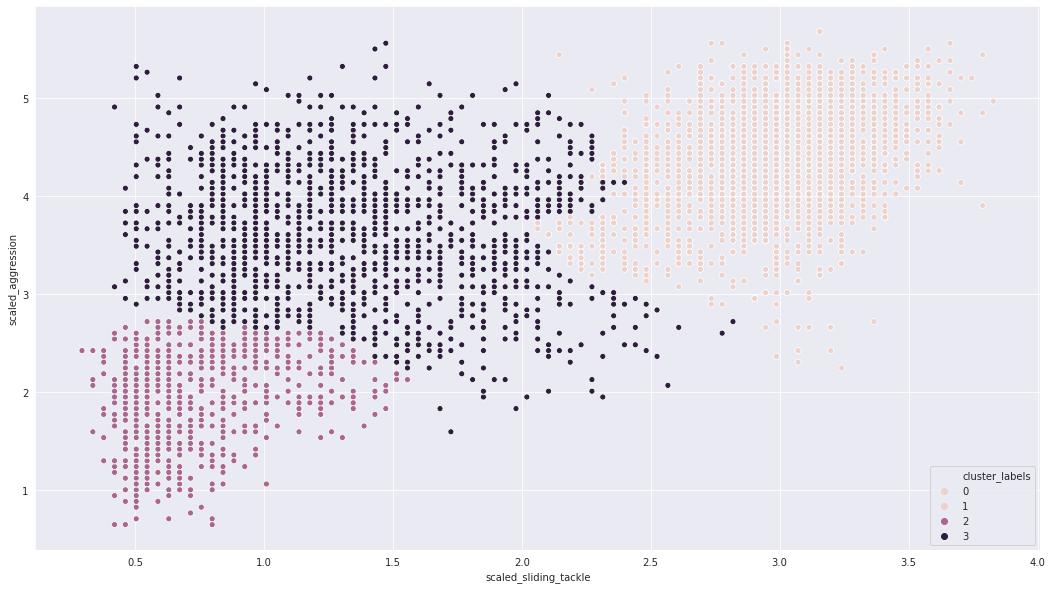

In [49]:
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', hue='cluster_labels', data=fifa)
plt.show()